About Dataset
This dataset was created to simulate a market basket dataset, providing insights into customer purchasing behavior and store operations. The dataset facilitates market basket analysis, customer segmentation, and other retail analytics tasks. Here's more information about the context and inspiration behind this dataset:


**Context:**
Retail businesses, from supermarkets to convenience stores, are constantly seeking ways to better understand their customers and improve their operations. Market basket analysis, a technique used in retail analytics, explores customer purchase patterns to uncover associations between products, identify trends, and optimize pricing and promotions. Customer segmentation allows businesses to tailor their offerings to specific groups, enhancing the customer experience.

**Inspiration:**
The inspiration for this dataset comes from the need for accessible and customizable market basket datasets. While real-world retail data is sensitive and often restricted, synthetic datasets offer a safe and versatile alternative. Researchers, data scientists, and analysts can use this dataset to develop and test algorithms, models, and analytical tools.

**Dataset Information:**
The columns provide information about the transactions, customers, products, and purchasing behavior, making the dataset suitable for various analyses, including market basket analysis and customer segmentation. Here's a brief explanation of each column in the Dataset:

Transaction_ID: A unique identifier for each transaction, represented as a 10-digit number. This column is used to uniquely identify each purchase.
Date: The date and time when the transaction occurred. It records the timestamp of each purchase.

Customer_Name: The name of the customer who made the purchase. It provides information about the customer's identity.
Product: A list of products purchased in the transaction. It includes the names of the products bought.

Total_Items: The total number of items purchased in the transaction. It represents the quantity of products bought.
Total_Cost: The total cost of the purchase, in currency. It represents the financial value of the transaction.

Payment_Method: The method used for payment in the transaction, such as credit card, debit card, cash, or mobile payment.
City: The city where the purchase took place. It indicates the location of the transaction.

Store_Type: The type of store where the purchase was made, such as a supermarket, convenience store, department store, etc.
Discount_Applied: A binary indicator (True/False) representing whether a discount was applied to the transaction.

Customer_Category: A category representing the customer's background or age group


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#load dataset

df = pd.read_csv('/content/Retail_Transactions_Dataset.csv')
df.head()

Transaction_ID                 Date      Customer_Name  \
0      1000000000  2022-01-21 06:27:29       Stacey Price   
1      1000000001  2023-03-01 13:01:21   Michelle Carlson   
2      1000000002  2024-03-21 15:37:04        Lisa Graves   
3      1000000003  2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004  2020-12-10 00:59:59     Susan Mitchell   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   Payment_Method           City        Store_Type  Discount_Applied  \
0  Mobile Payment    Los Angeles    Warehouse Club              True   
1            Cash  San Francisco   Specialty Store              True   
2     Credit Card        Houston  Department Store              True   
3  Mobile Payment        Chicago          Pharmacy              True   
4      Debit Card        Houston   Specialty Store             False   

  Customer_Category  Season                   Promotion  
0         Homemaker  Winter                         NaN  
1      Professional    Fall      BOGO (Buy One Get One)  
2      Professional  Winter                         NaN  
3         Homemaker  Spring                         NaN  
4       Young Adult  Winter  Discount on Selected Items

In [3]:
df.shape

(1000000, 13)

In [4]:
#1 millone data row and columns
(1000000, 13)

(1000000, 13)

In [5]:
df.isnull().sum()

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64

In [6]:
df['Promotion'].value_counts()

Promotion
Discount on Selected Items    333370
BOGO (Buy One Get One)        332687
Name: count, dtype: int64

In [7]:
# prompt: Promotion  ey columns er NAN value er jaygate nunvalue diya replace koro

# Fill NaN values in the 'Promotion' column with 'No'
df['Promotion'].fillna('Nothing', inplace=True)

# Verify the changes
print(df['Promotion'].value_counts())
print(df.isnull().sum())

<ipython-input-7-9d0eb3cb8b54>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Promotion'].fillna('Nothing', inplace=True)


Promotion
Nothing                       333943
Discount on Selected Items    333370
BOGO (Buy One Get One)        332687
Name: count, dtype: int64
Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64


In [8]:
df['Promotion'].value_counts()

Promotion
Nothing                       333943
Discount on Selected Items    333370
BOGO (Buy One Get One)        332687
Name: count, dtype: int64

In [9]:
#drop Transaction_ID or Customer_Name columns

if 'Transaction_ID' in df.columns:
   df.drop(columns='Transaction_ID', inplace=True)

df.head(2)

Date     Customer_Name  \
0  2022-01-21 06:27:29      Stacey Price   
1  2023-03-01 13:01:21  Michelle Carlson   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   

   Payment_Method           City       Store_Type  Discount_Applied  \
0  Mobile Payment    Los Angeles   Warehouse Club              True   
1            Cash  San Francisco  Specialty Store              True   

  Customer_Category  Season               Promotion  
0         Homemaker  Winter                 Nothing  
1      Professional    Fall  BOGO (Buy One Get One)

In [10]:
# Extracting components from the Date column
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute

# Display the first few rows to confirm extraction
df[['Date', 'Year', 'Month', 'Day', 'Hour', 'Minute']].head()

Date  Year  Month  Day  Hour  Minute
0 2022-01-21 06:27:29  2022      1   21     6      27
1 2023-03-01 13:01:21  2023      3    1    13       1
2 2024-03-21 15:37:04  2024      3   21    15      37
3 2020-10-31 09:59:47  2020     10   31     9      59
4 2020-12-10 00:59:59  2020     12   10     0      59

In [11]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar


df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
df['Is_Weekend'] = df['Date'].dt.dayofweek >= 5  # 5 = Saturday, 6 = Sunday
df['Quarter'] = df['Date'].dt.quarter
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=df['Date'].min(), end=df['Date'].max())

df['Is_Holiday'] = df['Date'].isin(holidays)
print(df[['Date', 'Is_Weekend', 'Quarter', 'Is_Holiday']].head())

                 Date  Is_Weekend  Quarter  Is_Holiday
0 2022-01-21 06:27:29       False        1       False
1 2023-03-01 13:01:21       False        1       False
2 2024-03-21 15:37:04       False        1       False
3 2020-10-31 09:59:47        True        4       False
4 2020-12-10 00:59:59       False        4       False


In [12]:
df.head(2)

Date     Customer_Name  \
0 2022-01-21 06:27:29      Stacey Price   
1 2023-03-01 13:01:21  Michelle Carlson   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   

   Payment_Method           City       Store_Type  Discount_Applied  \
0  Mobile Payment    Los Angeles   Warehouse Club              True   
1            Cash  San Francisco  Specialty Store              True   

  Customer_Category  Season               Promotion  Year  Month  Day  Hour  \
0         Homemaker  Winter                 Nothing  2022      1   21     6   
1      Professional    Fall  BOGO (Buy One Get One)  2023      3    1    13   

   Minute  Is_Weekend  Quarter  Is_Holiday  
0      27       False        1       False  
1       1       False        1       False

In [13]:
print(df['Payment_Method'].value_counts())
print("============================================")
print(df['Total_Items'].value_counts())
print("============================================")
print(df['City'].value_counts())
print("============================================")
print(df['Store_Type'].value_counts())
print("============================================")
print(df['Discount_Applied'].value_counts())
print("============================================")
print(df['Discount_Applied'].value_counts())
print("============================================")
print(df['Customer_Category'].value_counts())

Payment_Method
Cash              250230
Debit Card        250074
Credit Card       249985
Mobile Payment    249711
Name: count, dtype: int64
Total_Items
2     100444
5     100284
1     100097
6     100039
7     100027
8     100004
4      99962
3      99806
10     99782
9      99555
Name: count, dtype: int64
City
Boston           100566
Dallas           100559
Seattle          100167
Chicago          100059
Houston          100050
New York         100007
Los Angeles       99879
Miami             99839
San Francisco     99808
Atlanta           99066
Name: count, dtype: int64
Store_Type
Supermarket          166936
Pharmacy             166915
Convenience Store    166749
Warehouse Club       166685
Department Store     166614
Specialty Store      166101
Name: count, dtype: int64
Discount_Applied
True     500104
False    499896
Name: count, dtype: int64
Discount_Applied
True     500104
False    499896
Name: count, dtype: int64
Customer_Category
Senior Citizen    125485
Homemaker         1254

In [14]:
df.describe()

Date     Total_Items      Total_Cost  \
count                        1000000  1000000.000000  1000000.000000   
mean   2022-03-10 21:46:28.440430080        5.495941       52.455220   
min              2020-01-01 00:03:54        1.000000        5.000000   
25%    2021-02-03 23:15:59.249999872        3.000000       28.710000   
50%       2022-03-10 19:23:17.500000        5.000000       52.420000   
75%              2023-04-14 23:06:37        8.000000       76.190000   
max              2024-05-18 19:31:03       10.000000      100.000000   
std                              NaN        2.871654       27.416989   

                 Year           Month             Day            Hour  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean      2021.716168        6.199467       15.643938       11.506956   
min       2020.000000        1.000000        1.000000        0.000000   
25%       2021.000000        3.000000        8.000000        6.000000   
50%       2022.000000        6.000000       16.000000       12.000000   
75%       2023.000000        9.000000       23.000000       18.000000   
max       2024.000000       12.000000       31.000000       23.000000   
std          1.279786        3.479816        8.796843        6.917519   

               Minute         Quarter  
count  1000000.000000  1000000.000000  
mean        29.470680        2.406824  
min          0.000000        1.000000  
25%         14.000000        1.000000  
50%         29.000000        2.000000  
75%         44.000000        3.000000  
max         59.000000        4.000000  
std         17.313918        1.125752

In [15]:
df['Product']

0               ['Ketchup', 'Shaving Cream', 'Light Bulbs']
1         ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...
2                                               ['Spinach']
3                                    ['Tissues', 'Mustard']
4                                             ['Dish Soap']
                                ...                        
999995    ['Pickles', 'Carrots', 'Peanut Butter', 'Spong...
999996                                           ['Cereal']
999997                                       ['Trash Bags']
999998               ['Diapers', 'Coffee', 'Coffee', 'Mop']
999999                         ['Trash Cans', 'Mop', 'Jam']
Name: Product, Length: 1000000, dtype: object

In [16]:
import re
# Example usage: cleaning the 'Product' column
df['Product'] = df['Product'].astype(str).apply(lambda x: re.sub(r"[\[\]']", '', x))
df['Product'] = df['Product'].astype(str).apply(lambda x: re.sub(r"\s+", ' ', x)) #remove multiple space
df['Product'] = df['Product'].astype(str).apply(lambda x: re.sub(r',', '', x))

df['Product']

0                       Ketchup Shaving Cream Light Bulbs
1                 Ice Cream Milk Olive Oil Bread Potatoes
2                                                 Spinach
3                                         Tissues Mustard
4                                               Dish Soap
                               ...                       
999995    Pickles Carrots Peanut Butter Sponges BBQ Sauce
999996                                             Cereal
999997                                         Trash Bags
999998                          Diapers Coffee Coffee Mop
999999                                 Trash Cans Mop Jam
Name: Product, Length: 1000000, dtype: object

## EDA-- Exploratory Data Analysis

In [17]:
df.head(2)

Date     Customer_Name  \
0 2022-01-21 06:27:29      Stacey Price   
1 2023-03-01 13:01:21  Michelle Carlson   

                                   Product  Total_Items  Total_Cost  \
0        Ketchup Shaving Cream Light Bulbs            3       71.65   
1  Ice Cream Milk Olive Oil Bread Potatoes            2       25.93   

   Payment_Method           City       Store_Type  Discount_Applied  \
0  Mobile Payment    Los Angeles   Warehouse Club              True   
1            Cash  San Francisco  Specialty Store              True   

  Customer_Category  Season               Promotion  Year  Month  Day  Hour  \
0         Homemaker  Winter                 Nothing  2022      1   21     6   
1      Professional    Fall  BOGO (Buy One Get One)  2023      3    1    13   

   Minute  Is_Weekend  Quarter  Is_Holiday  
0      27       False        1       False  
1       1       False        1       False

<ipython-input-18-50d7409fd92d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette='coolwarm')


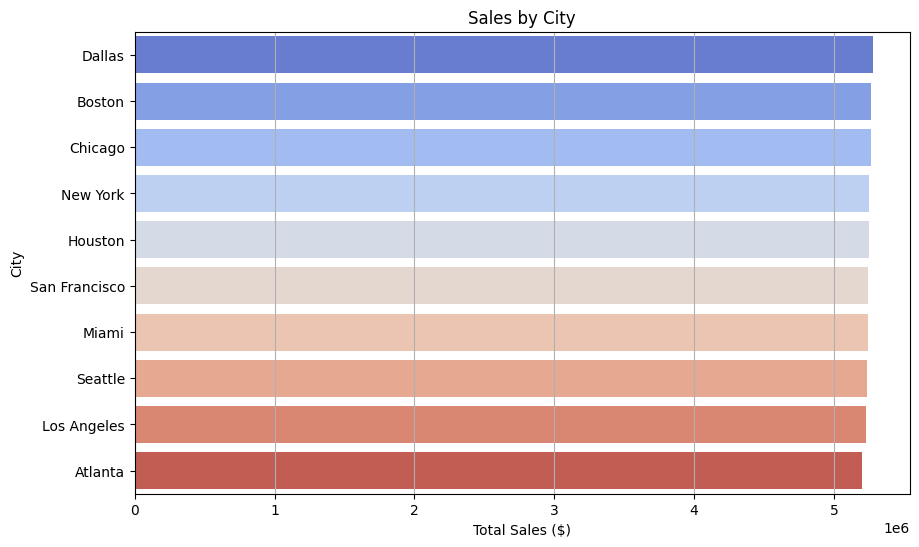

In [18]:
# 1. Sales by City
city_sales = df.groupby('City')['Total_Cost'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=city_sales.values, y=city_sales.index, palette='coolwarm')
plt.title("Sales by City")
plt.xlabel("Total Sales ($)")
plt.ylabel("City")
plt.grid(axis='x')
plt.show()

<ipython-input-19-dc21228583a5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales.values, y=store_sales.index, palette='magma')


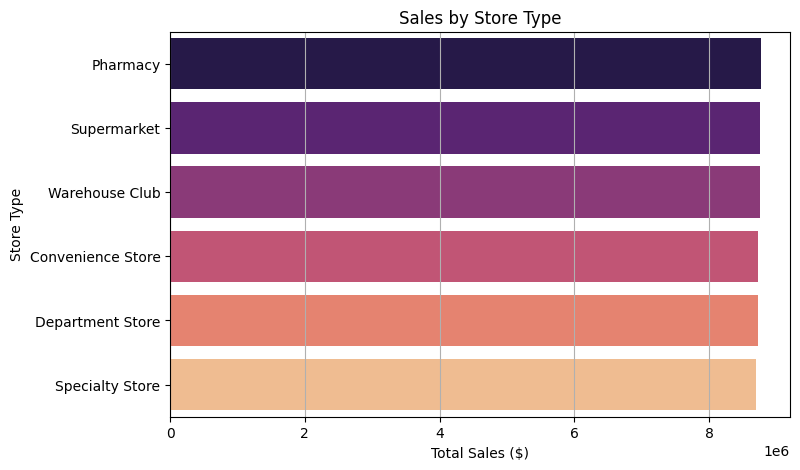

In [19]:
# 2. Sales by Store Type
store_sales = df.groupby('Store_Type')['Total_Cost'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=store_sales.values, y=store_sales.index, palette='magma')
plt.title("Sales by Store Type")
plt.xlabel("Total Sales ($)")
plt.ylabel("Store Type")
plt.grid(axis='x')
plt.show()

<ipython-input-20-911bd5068aff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_spending.values, y=customer_spending.index, palette='viridis')


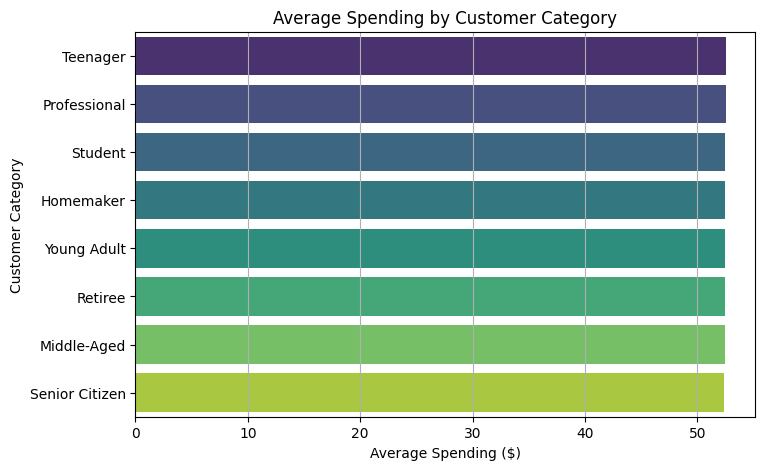

In [20]:
# 3. Spending by Customer Category
customer_spending = df.groupby('Customer_Category')['Total_Cost'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_spending.values, y=customer_spending.index, palette='viridis')
plt.title("Average Spending by Customer Category")
plt.xlabel("Average Spending ($)")
plt.ylabel("Customer Category")
plt.grid(axis='x')
plt.show()

<ipython-input-21-1fe2418d1d47>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotion_effectiveness.values, y=promotion_effectiveness.index, palette='plasma')


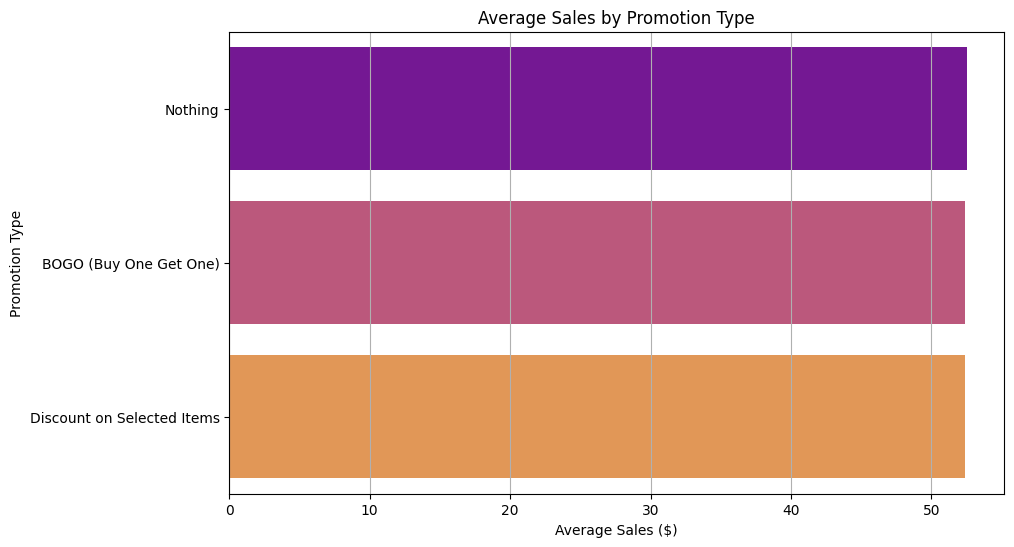

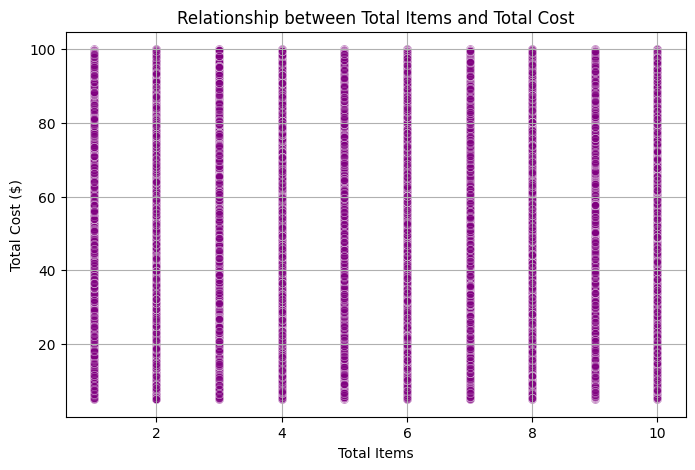

<ipython-input-21-1fe2418d1d47>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_avg_sales.index, y=discount_avg_sales.values, palette='Set2')


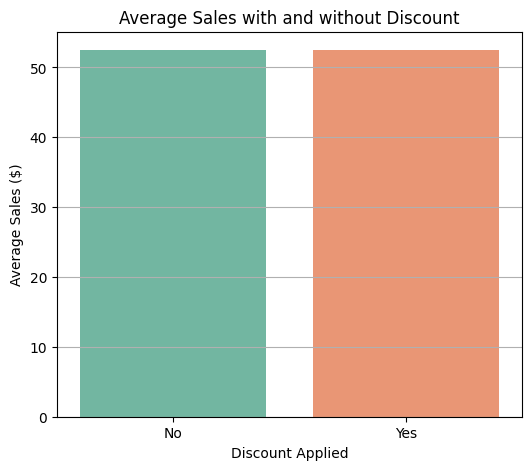

In [21]:
# 4. Effectiveness of Promotions
promotion_effectiveness = df.groupby('Promotion')['Total_Cost'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=promotion_effectiveness.values, y=promotion_effectiveness.index, palette='plasma')
plt.title("Average Sales by Promotion Type")
plt.xlabel("Average Sales ($)")
plt.ylabel("Promotion Type")
plt.grid(axis='x')
plt.show()

# 5. Relationship between Total Items and Total Cost
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Total_Items', y='Total_Cost', data=df, alpha=0.5, color='purple')
plt.title("Relationship between Total Items and Total Cost")
plt.xlabel("Total Items")
plt.ylabel("Total Cost ($)")
plt.grid(True)
plt.show()

# 6. Discount Impact on Average Sales
discount_avg_sales = df.groupby('Discount_Applied')['Total_Cost'].mean()
plt.figure(figsize=(6, 5))
sns.barplot(x=discount_avg_sales.index, y=discount_avg_sales.values, palette='Set2')
plt.title("Average Sales with and without Discount")
plt.xlabel("Discount Applied")
plt.ylabel("Average Sales ($)")
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.grid(axis='y')
plt.show()

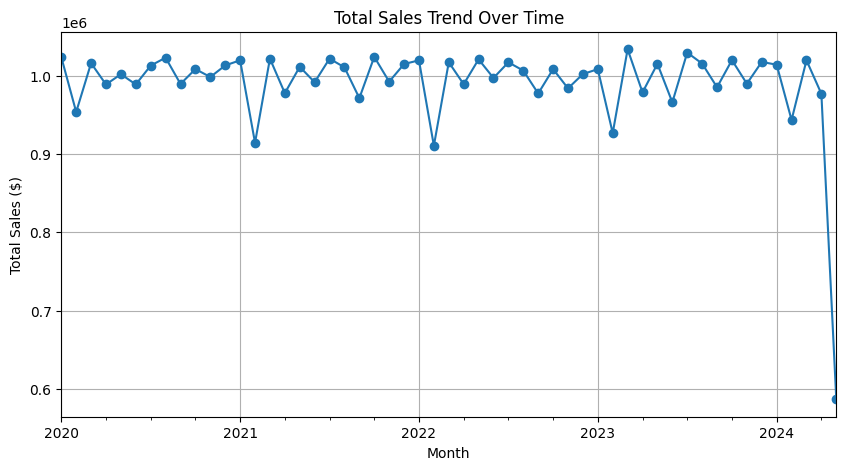

<ipython-input-22-861897e4f19d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_products.values, y=popular_products.index, palette='viridis')


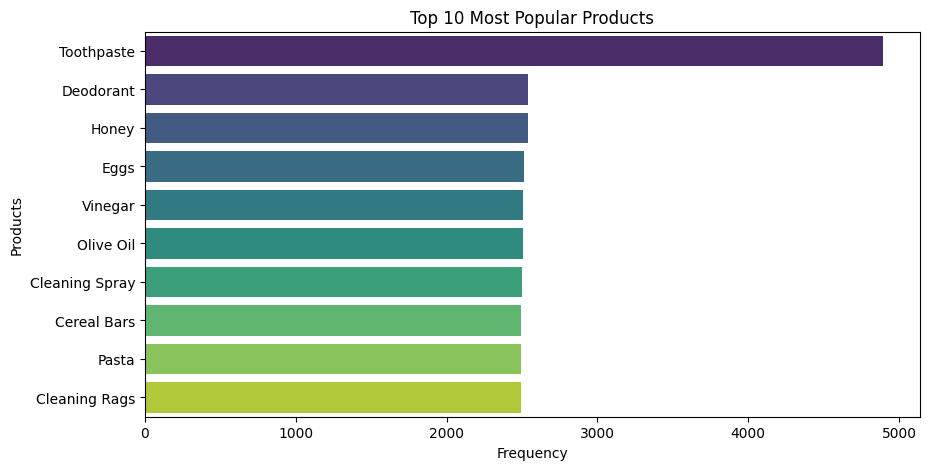

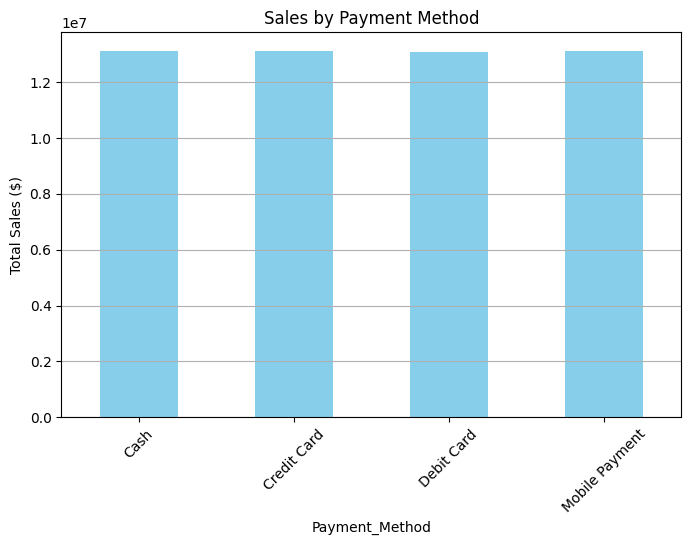

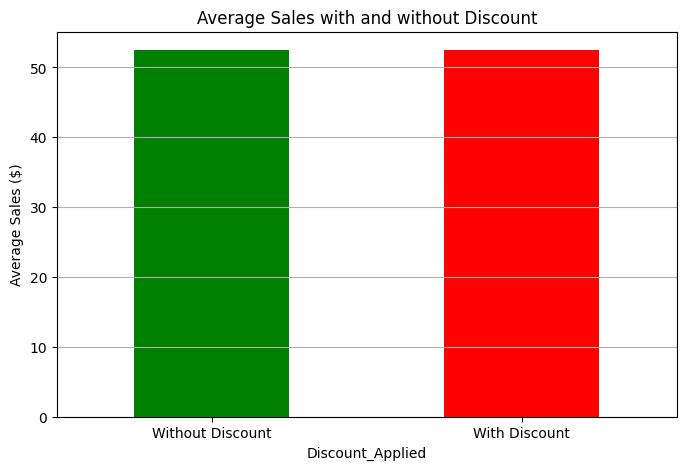

<ipython-input-22-861897e4f19d>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_sales.index, y=season_sales.values, palette='pastel')


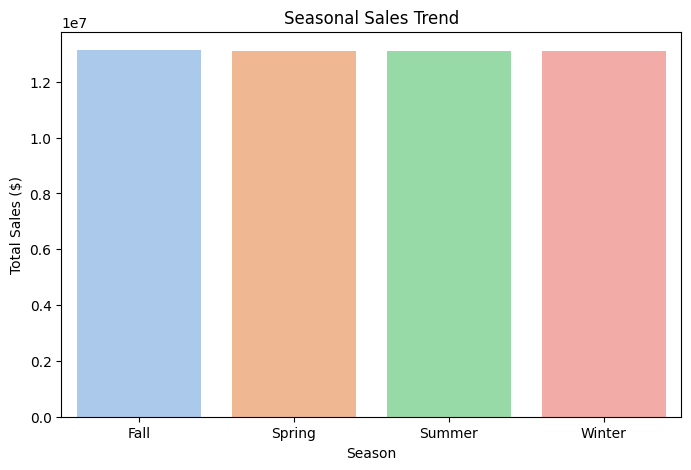

['Sales trend over time',
 'Most popular products',
 'Sales by payment method',
 'Discount effectiveness',
 'Seasonal sales trend']

In [22]:
# Convert 'Date' to datetime for time-based analysis
df['Date'] = pd.to_datetime(df['Date'])

# Prepare a list of required plots
plots = []

# 1. Total sales trend over time
sales_trend = df.groupby(df['Date'].dt.to_period('M')).sum(numeric_only=True)['Total_Cost']
plt.figure(figsize=(10, 5))
sales_trend.plot(kind='line', marker='o', title="Total Sales Trend Over Time")
plt.ylabel("Total Sales ($)")
plt.xlabel("Month")
plt.grid(True)
plt.show()
plots.append("Sales trend over time")

# 2. Most popular products
df['Product'] = df['Product'].str.strip('[]').str.replace("'", "").str.split(', ')
popular_products = df['Product'].explode().value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=popular_products.values, y=popular_products.index, palette='viridis')
plt.title("Top 10 Most Popular Products")
plt.xlabel("Frequency")
plt.ylabel("Products")
plt.show()
plots.append("Most popular products")

# 3. Sales by payment method
payment_sales = df.groupby('Payment_Method')['Total_Cost'].sum()
plt.figure(figsize=(8, 5))
payment_sales.plot(kind='bar', color='skyblue', title="Sales by Payment Method")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
plots.append("Sales by payment method")

# 4. Discount effectiveness
discount_effectiveness = df.groupby('Discount_Applied')['Total_Cost'].mean()
plt.figure(figsize=(8, 5))
discount_effectiveness.plot(kind='bar', color=['green', 'red'], title="Average Sales with and without Discount")
plt.ylabel("Average Sales ($)")
plt.xticks([0, 1], ['Without Discount', 'With Discount'], rotation=0)
plt.grid(axis='y')
plt.show()
plots.append("Discount effectiveness")

# 5. Seasonal sales trend
season_sales = df.groupby('Season')['Total_Cost'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=season_sales.index, y=season_sales.values, palette='pastel')
plt.title("Seasonal Sales Trend")
plt.ylabel("Total Sales ($)")
plt.xlabel("Season")
plt.show()
plots.append("Seasonal sales trend")

# Display the list of plots generated
plots

In [23]:
df.to_csv('clean_Retail_Transactions_Dataset.csv', index=False)

In [24]:
!pip install autoviz
!pip install pandas-profiling[notebook]
!!pip install -U ydata-profiling

['Requirement already satisfied: ydata-profiling in /usr/local/lib/python3.10/dist-packages (4.12.1)',
 'Requirement already satisfied: scipy<1.14,>=1.4.1 in /usr/local/lib/python3.10/dist-packages (from ydata-profiling) (1.13.1)',
 'Requirement already satisfied: pandas!=1.4.0,<3,>1.1 in /usr/local/lib/python3.10/dist-packages (from ydata-profiling) (2.2.2)',
 'Requirement already satisfied: matplotlib<3.10,>=3.5 in /usr/local/lib/python3.10/dist-packages (from ydata-profiling) (3.8.0)',
 'Requirement already satisfied: pydantic>=2 in /usr/local/lib/python3.10/dist-packages (from ydata-profiling) (2.10.3)',
 'Requirement already satisfied: PyYAML<6.1,>=5.0.0 in /usr/local/lib/python3.10/dist-packages (from ydata-profiling) (6.0.2)',
 'Requirement already satisfied: jinja2<3.2,>=2.11.1 in /usr/local/lib/python3.10/dist-packages (from ydata-profiling) (3.1.4)',
 'Requirement already satisfied: visions<0.7.7,>=0.7.5 in /usr/local/lib/python3.10/dist-packages (from visions[type_image_path

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 20)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['Total_Cost']
    Integer-Categorical Columns: ['Total_Items', 'Month', 'Day', 'Hour', 'Minute', 'Quarter']
    String-Categorical Columns: ['Date', 'Customer_Name', 'Payment_Method',

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do


**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Could not draw wordcloud plot for Product. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBl

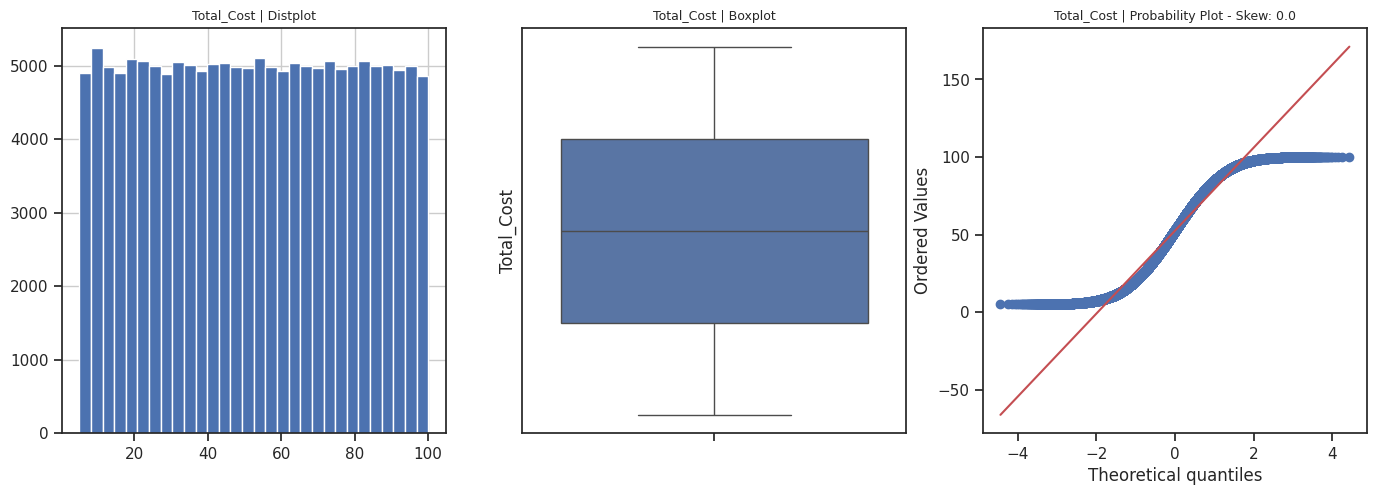

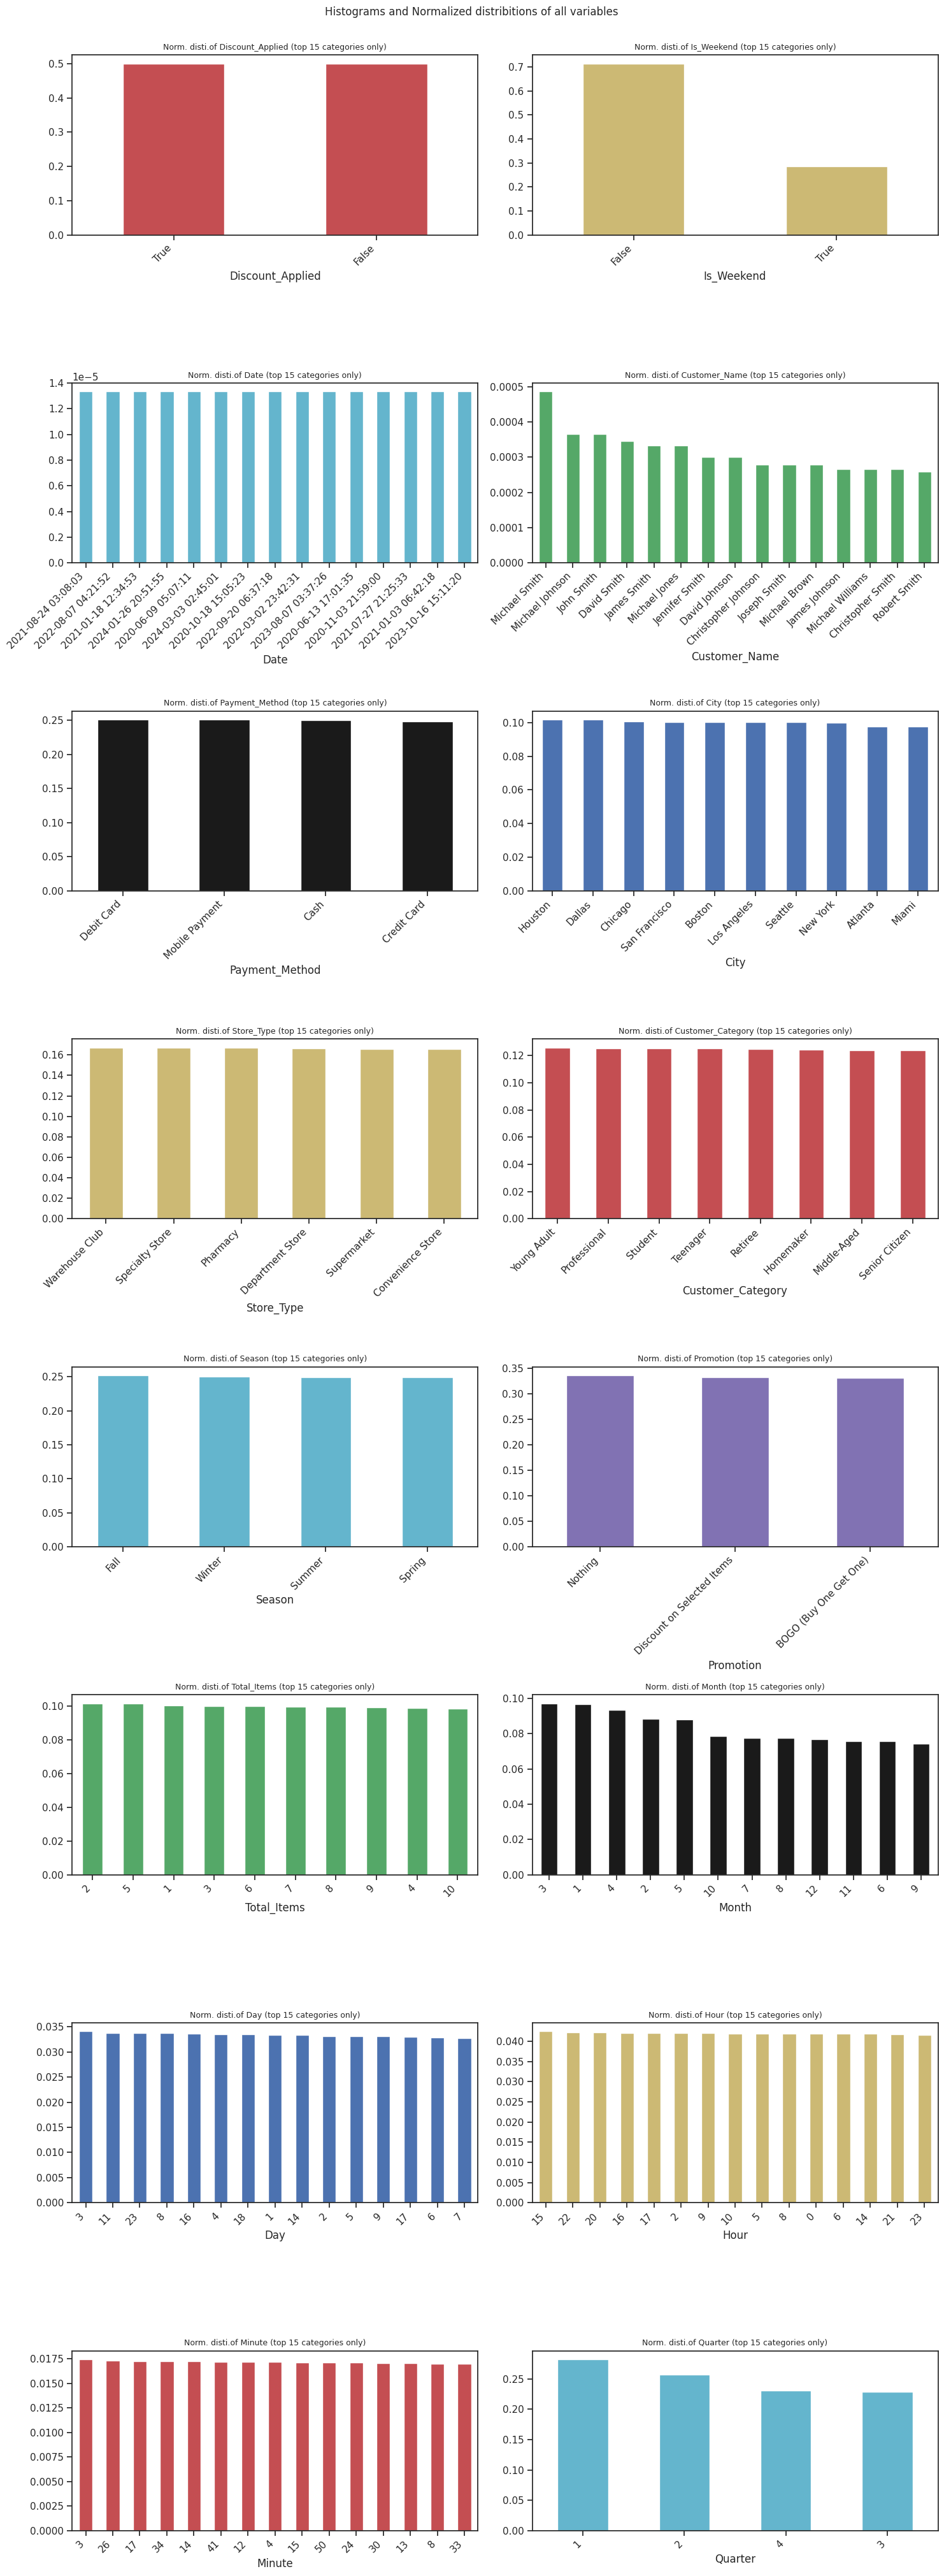

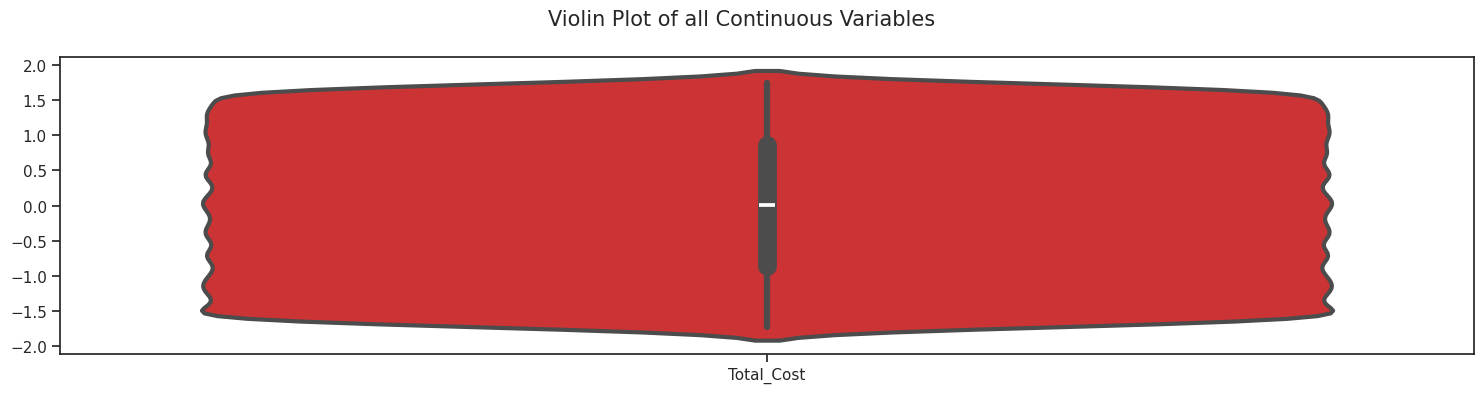

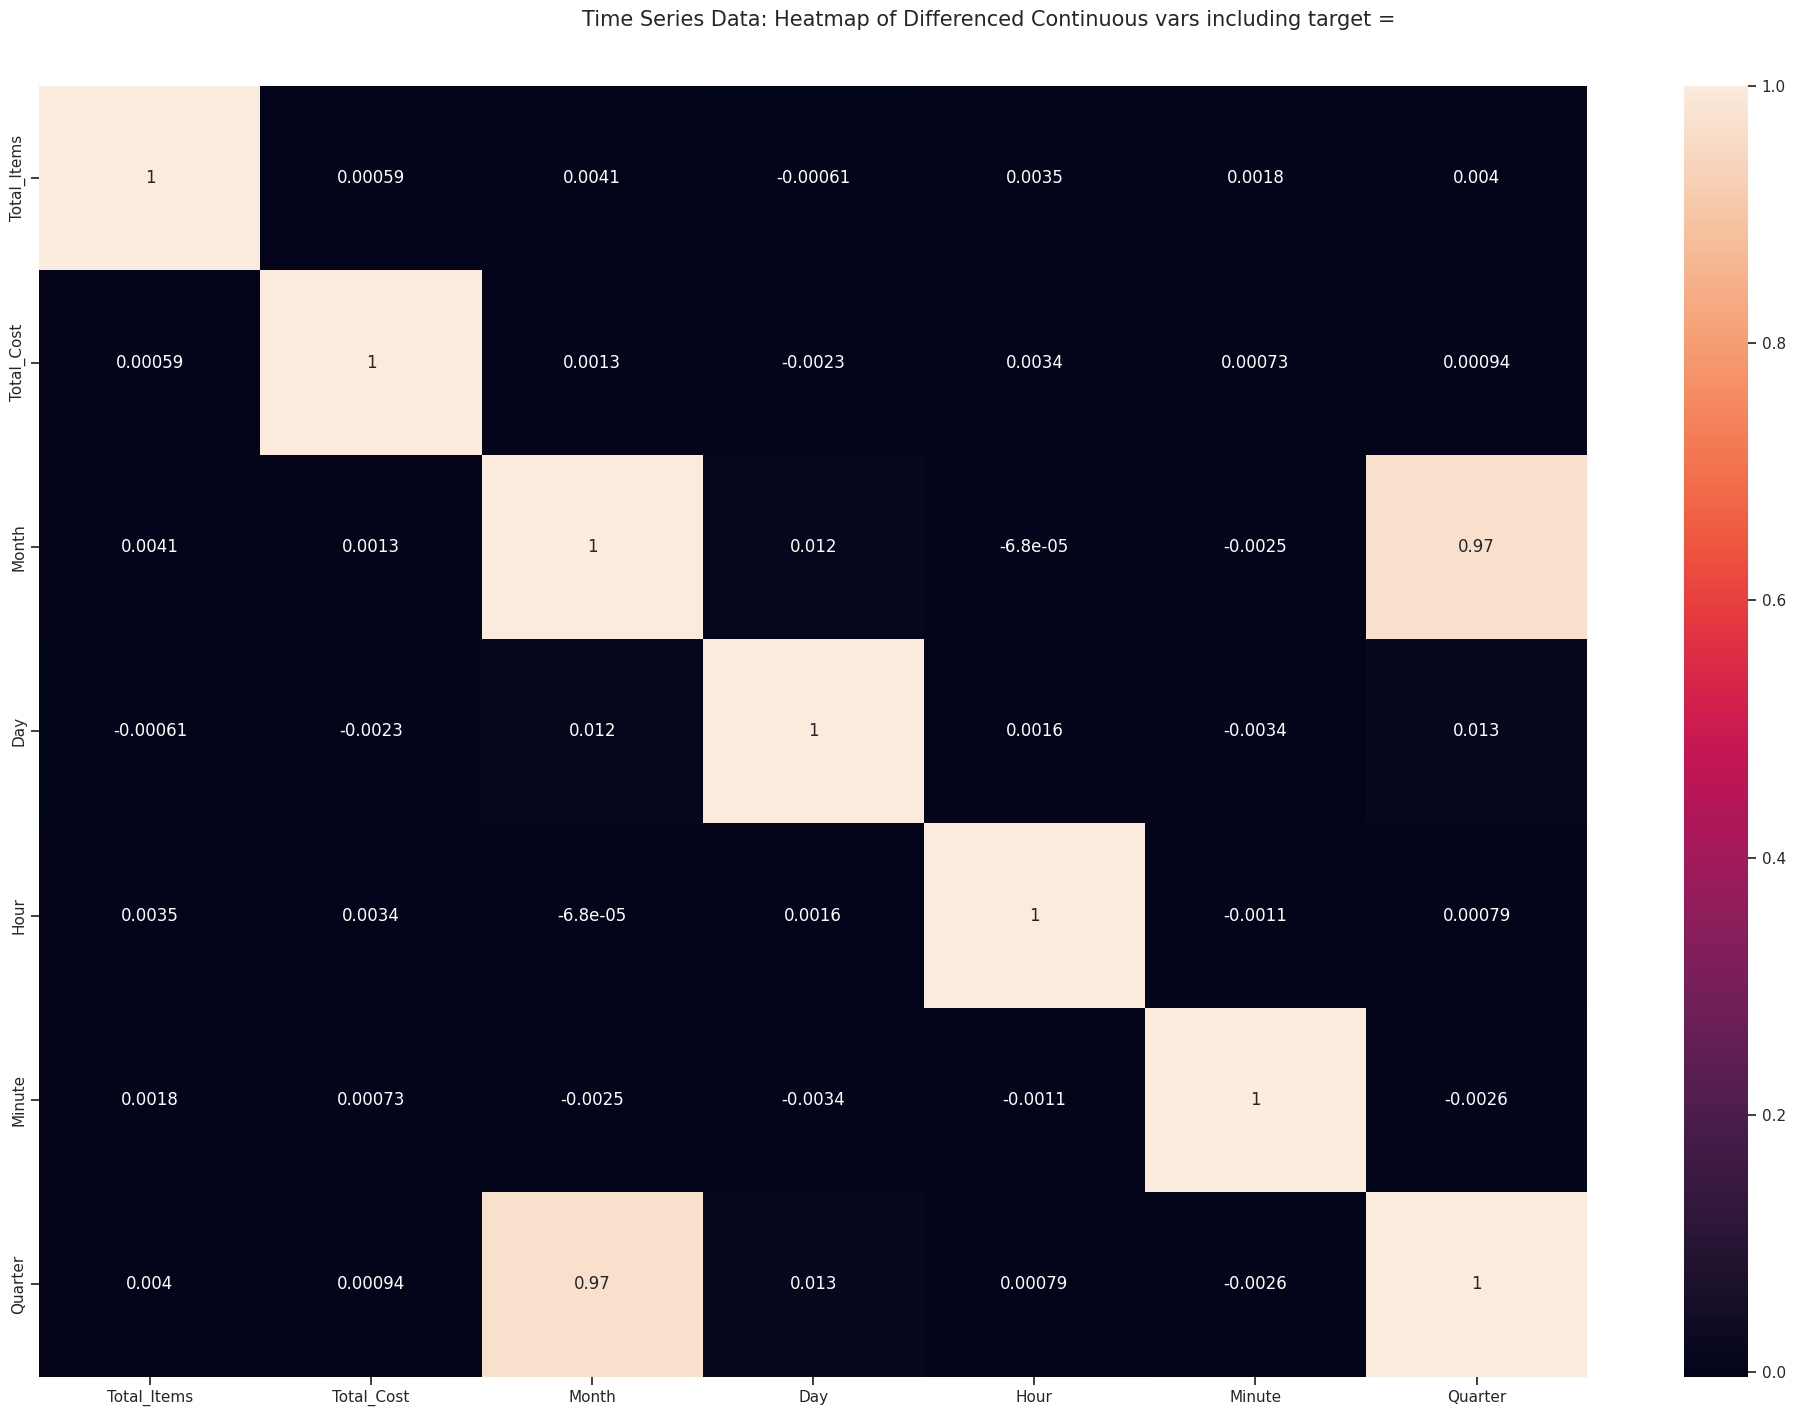

<Figure size 1500x0 with 0 Axes>

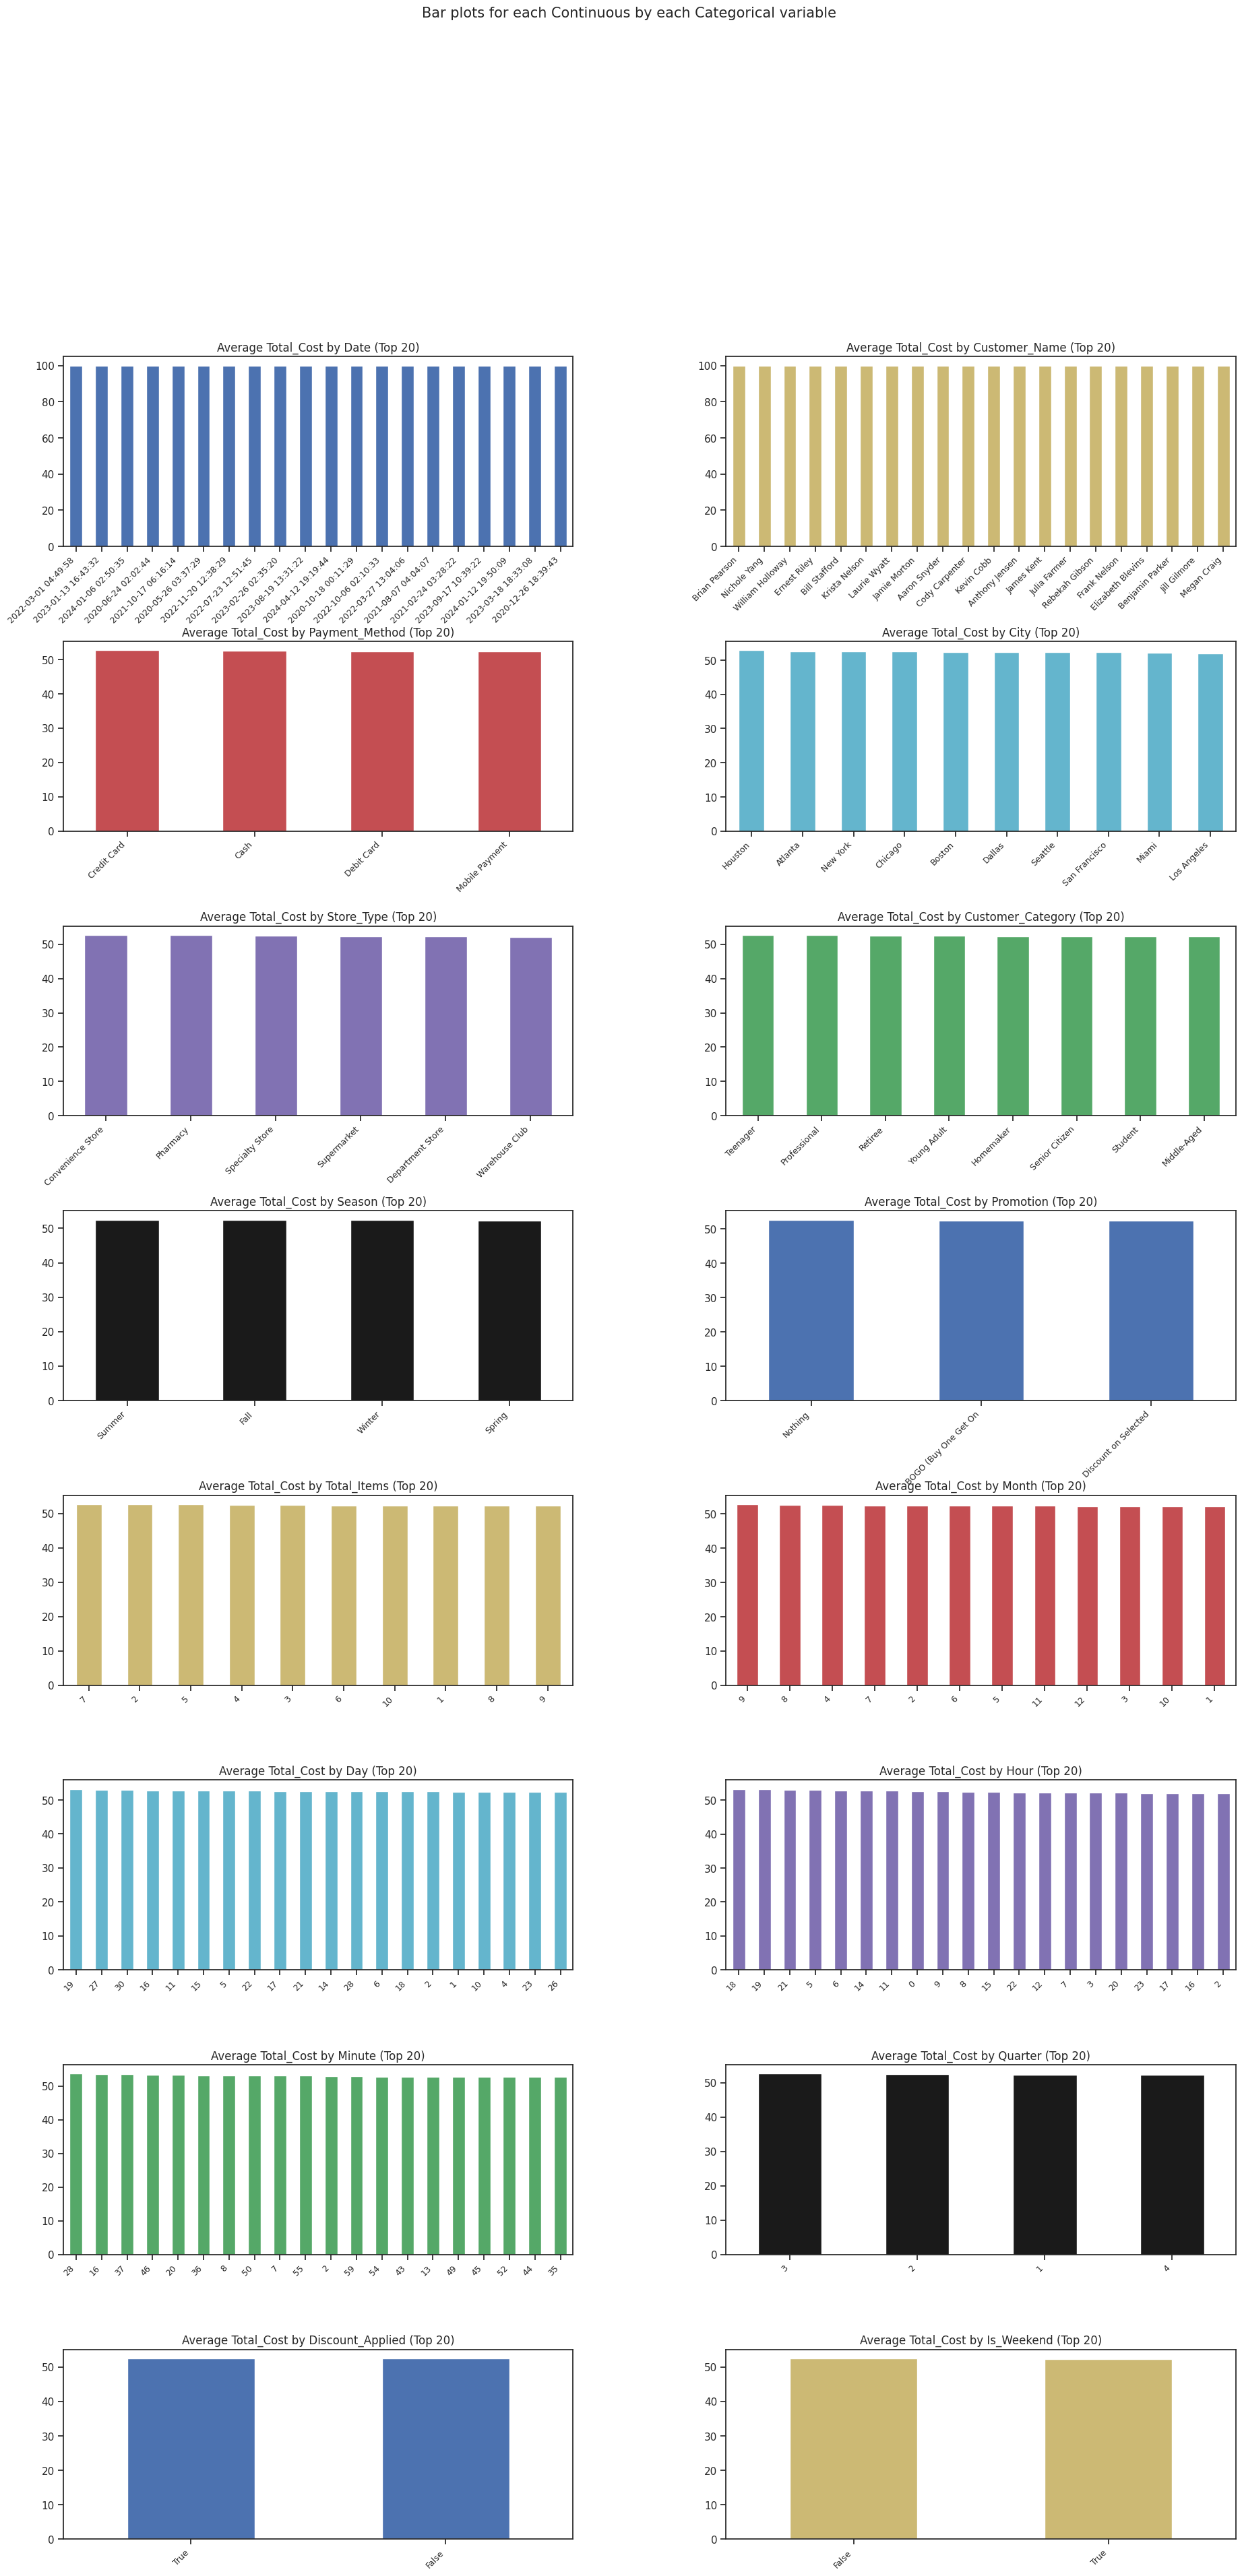

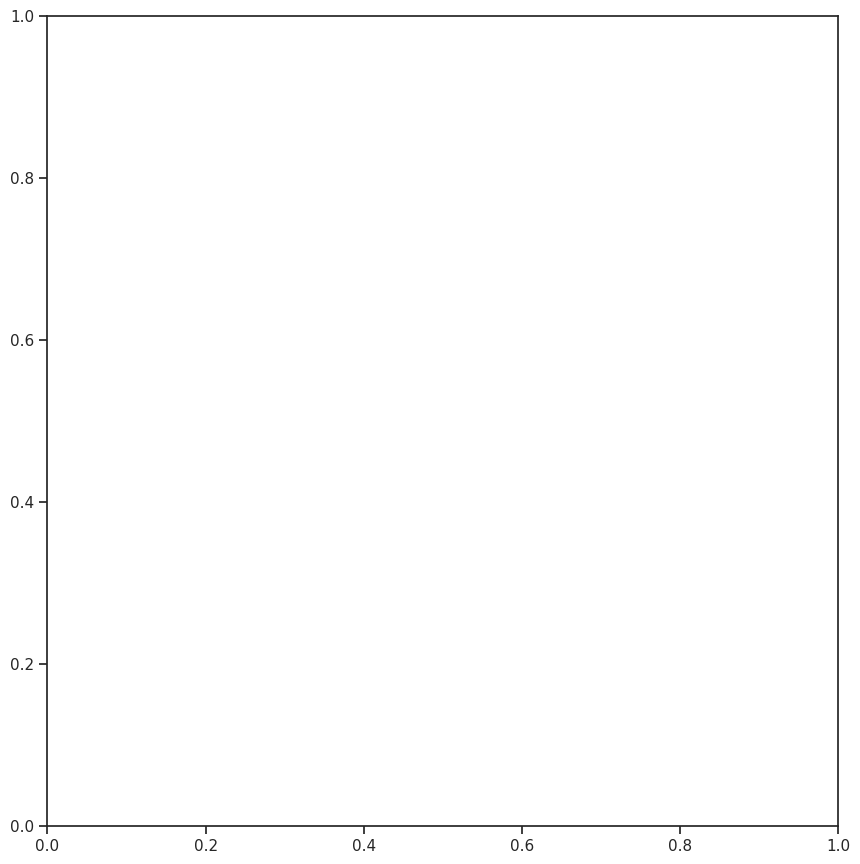

In [25]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
df = pd.read_csv('/content/clean_Retail_Transactions_Dataset.csv')

dft = AV.AutoViz(
    filename="",
    dfte=df,
    depVar="",
    verbose=2,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

In [26]:

import pandas as pd
from ydata_profiling import ProfileReport
%matplotlib inline
# ... (rest of your code) ...

profile = ProfileReport(df, title="Retail Transactions Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
# import ast  # For safe literal evaluation

# # Safely convert the Product column to lists by parsing string literals
# def safe_eval(product_string):
#     try:
#         return ast.literal_eval(product_string)  # Safely evaluate to list
#     except (ValueError, SyntaxError):  # Catch malformed entries
#         return []  # Return an empty list if parsing fails

# # Apply the function to fix the column
# df['Product'] = df['Product'].apply(safe_eval)

# # Check the first few rows to ensure correctness
# print(df['Product'].head())



Top 20 products by sales:
Product
Toothpaste         4893
Deodorant          2541
Honey              2540
Eggs               2515
Vinegar            2505
Olive Oil          2505
Cleaning Spray     2503
Cereal Bars        2494
Pasta              2493
Cleaning Rags      2492
Beef               2485
Jam                2485
Trash Bags         2482
Hand Sanitizer     2479
Soap               2478
Light Bulbs        2478
Extension Cords    2472
Razors             2469
Tuna               2467
Garden Hose        2466
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 20 Products by Sales')

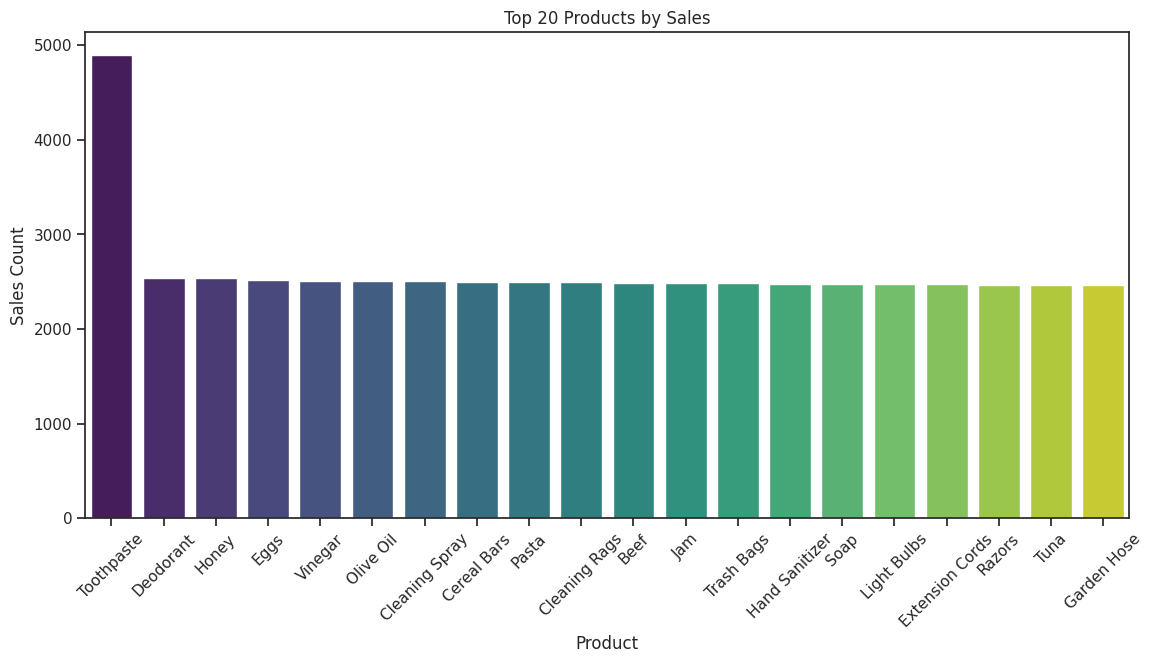

In [28]:
# Ensure 'Product' column is processed correctly
# Check if the 'Product' column contains strings before applying eval
if df['Product'].dtype == object and isinstance(df['Product'].iloc[0], str):  # Assuming strings are stored as object dtype and checking the first element
    df['Product'] = df['Product'].apply(eval)  # Convert the string to a Python list
else:
    print("The 'Product' column already contains lists or a different data type. Skipping eval.")

# Expand the product lists into separate rows
products = df.explode('Product')

# Count occurrences of each product
product_counts = products['Product'].value_counts()

# Get the top 20 most sold products
top_20_products = product_counts.head(20)

print("Top 20 products by sales:")
print(top_20_products)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_products.index, y=top_20_products.values, palette='viridis')
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.ylabel("Sales Count")
plt.title("Top 20 Products by Sales")

In [29]:
df.head(1)

Date         Customer_Name               Product                 \
0  2022-01-21 06:27:29  Stacey Price  [Ketchup Shaving Cream Light Bulbs]   

   Total_Items  Total_Cost  Payment_Method     City        Store_Type    \
0       3          71.65    Mobile Payment  Los Angeles  Warehouse Club   

   Discount_Applied Customer_Category  Season Promotion  Year  Month  Day  \
0        True            Homemaker     Winter   Nothing  2022    1    21    

   Hour  Minute  Is_Weekend  Quarter  Is_Holiday  
0    6     27       False       1        False

## **Model Building**

In [30]:
# বিক্রয় পূর্বাভাস (Sales Prediction)
# অ্যালগরিদম: রিগ্রেশন মডেল (লিনিয়ার রিগ্রেশন, র‍্যান্ডম ফরেস্ট, XGBoost)।
# ব্যবহারযোগ্য ফিচার: Year, Month, Day, Hour, Is_Weekend, Quarter, Total_Items, Is_Holiday।
# লক্ষ্য (Target): Total_Cost।


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Prepare the data
features = ['Year', 'Month', 'Day', 'Hour', 'Is_Weekend', 'Quarter', 'Total_Items']
target = 'Total_Cost'

X = df[features]
y = df[target]

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared: {r2}")

# Feature Importance
importances = model.feature_importances_
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.2f}")


Root Mean Squared Error: 31.408137680632404
R-Squared: -0.31142996889877206
Year: 0.12
Month: 0.13
Day: 0.24
Hour: 0.25
Is_Weekend: 0.03
Quarter: 0.03
Total_Items: 0.21


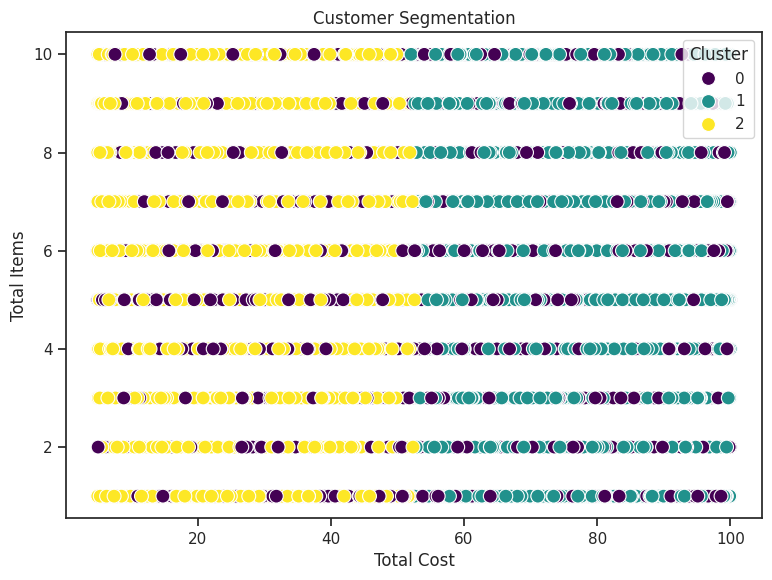

In [31]:
# ২. কাস্টমার ক্লাস্টারিং (Customer Segmentation)
# অ্যালগরিদম: K-Means Clustering।
# ব্যবহারযোগ্য ফিচার: Total_Cost, Total_Items, Is_Weekend, Quarter।
# লক্ষ্য: কাস্টমারদের বিভিন্ন সেগমেন্টে ভাগ করা।


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select features for clustering
features = ['Total_Cost', 'Total_Items', 'Is_Weekend', 'Quarter']
X = df[features]

# Step 2: Normalize the data (optional but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Total_Cost'],
    y=df['Total_Items'],
    hue=df['Cluster'],
    palette='viridis',
    s=100
)
plt.title("Customer Segmentation")
plt.xlabel("Total Cost")
plt.ylabel("Total Items")
plt.legend(title="Cluster")
plt.show()


In [32]:
# ৩. ডিসকাউন্ট কার্যকারিতা (Effectiveness of Discounts)
# অ্যালগরিদম: লজিস্টিক রিগ্রেশন।
# ব্যবহারযোগ্য ফিচার: Is_Weekend, Quarter, Is_Holiday, Discount_Applied।
# লক্ষ্য: বিক্রয়ের পরিমাণ বেশি বা কম হয়েছে কিনা (বাইনারি ক্লাসিফিকেশন)।

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Prepare the data
features = ['Is_Weekend', 'Quarter', 'Is_Holiday', 'Discount_Applied']
target = 'High_Sales'  # Create a binary column for high/low sales
df['High_Sales'] = (df['Total_Cost'] > df['Total_Cost'].median()).astype(int)

X = df[features]
y = df['High_Sales']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.69      0.58     99651
           1       0.50      0.32      0.39    100349

    accuracy                           0.50    200000
   macro avg       0.50      0.50      0.48    200000
weighted avg       0.50      0.50      0.48    200000

Accuracy: 0.5007


In [33]:
!pip install prophet
!pip install pmdarima

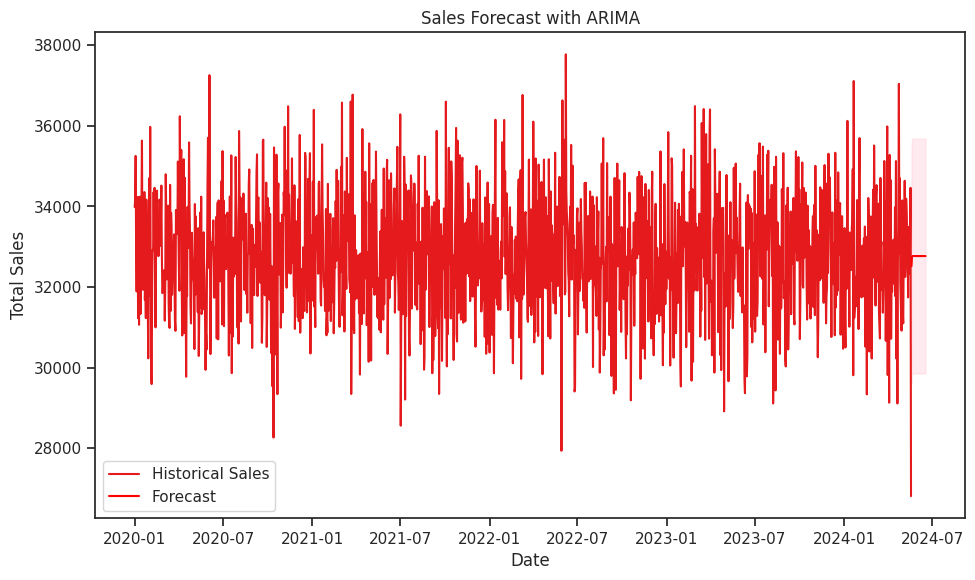

In [34]:
# ৪. বিক্রয়ের সময়ভিত্তিক বিশ্লেষণ (Time-Series Analysis)
# অ্যালগরিদম: ARIMA, Prophet।
# ব্যবহারযোগ্য ফিচার: Date, Total_Cost।
# লক্ষ্য: ভবিষ্যতের বিক্রয় পূর্বাভাস।


from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare the data
df['Date'] = pd.to_datetime(df['Date'])
time_data = df.groupby('Date')['Total_Cost'].sum()  # Aggregate sales by date
time_data = time_data.resample('D').sum().fillna(0)  # Ensure daily frequency

# Fit ARIMA model
model = ARIMA(time_data, order=(1, 1, 1))  # Adjust parameters (p, d, q) as needed
result = model.fit()

# Make predictions
forecast = result.get_forecast(steps=30)
forecast_index = forecast.predicted_mean.index
forecast_values = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(time_data.index, time_data, label="Historical Sales")
plt.plot(forecast_index, forecast_values, label="Forecast", color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title("Sales Forecast with ARIMA")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()


In [35]:
# Customer Lifetime Value (CLV) Prediction
# ব্যাখ্যা: CLV অনুমান করতে আমরা প্রতিটি গ্রাহকের লেনদেনের সংখ্যা এবং মোট ব্যয় ব্যবহার করব।
# অ্যালগরিদম: রিগ্রেশন মডেল (লিনিয়ার বা র‍্যান্ডম ফরেস্ট)।
# ব্যবহারযোগ্য ফিচার: Customer_Name, Total_Cost, Total_Items, Is_Weekend, Is_Holiday।
# লক্ষ্য (Target): গ্রাহকের ভবিষ্যৎ মোট খরচ অনুমান।



# Step 1: Aggregate customer data
customer_data = df.groupby('Customer_Name').agg({
    'Total_Cost': 'sum',   # Total spending
    'Total_Items': 'sum',  # Total items purchased
    'Is_Weekend': 'mean',  # Proportion of purchases on weekends
    'Is_Holiday': 'mean',  # Proportion of purchases on holidays
}).reset_index()

# Add target variable (e.g., future spending based on current spending)
customer_data['CLV'] = customer_data['Total_Cost']  # In a real case, we predict this value

# Step 2: Prepare features and target
features = ['Total_Cost', 'Total_Items', 'Is_Weekend', 'Is_Holiday']
X = customer_data[features]
y = customer_data['CLV']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"CLV Prediction RMSE: {rmse}")


CLV Prediction RMSE: 5.985360609746657
